<a href="https://colab.research.google.com/github/Hajara-Waseem/LAB-TASK-09_DiP/blob/main/TASK_09_DIP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import files
import cv2
import numpy as np
from matplotlib import pyplot as plt

In [ ]:
from google.colab import files

# This will open a file picker dialog to let you select and upload files.
uploaded = files.upload()

for filename in uploaded.keys():
  print(f'User uploaded file "{filename}" with length {len(uploaded[filename])} bytes')


Saving bowsprit_daisy_1_559463.jpg to bowsprit_daisy_1_559463.jpg
User uploaded file "bowsprit_daisy_1_559463.jpg" with length 28156 bytes


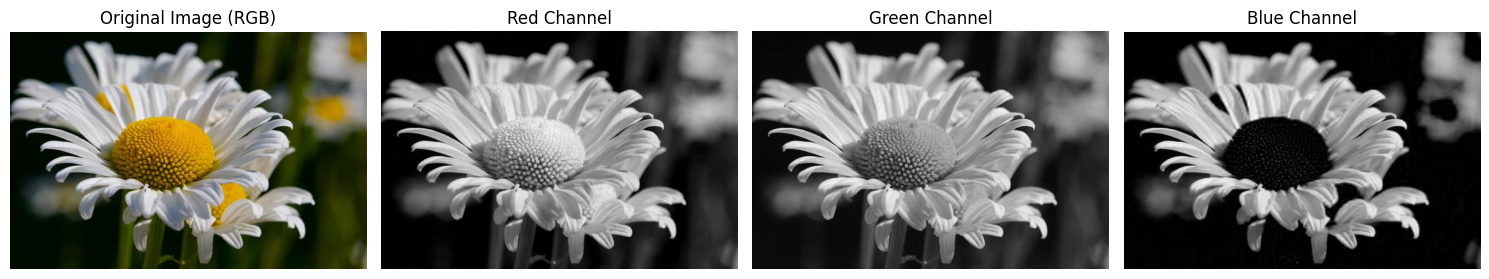

In [ ]:
image = cv2.imread(filename)

if image is None:
    print(f"Error: Could not load image from {filename}")
else:
    # Split the image into B, G, R channels
    b, g, r = cv2.split(image)

    # Convert the original image from BGR to RGB for displaying with matplotlib
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Create a figure with subplots to display the images
    plt.figure(figsize=(15, 5))

    plt.subplot(1, 4, 1)
    plt.imshow(image_rgb)
    plt.title('Original Image (RGB)')
    plt.axis('off')

    plt.subplot(1, 4, 2)
    plt.imshow(r, cmap='gray') # Red channel
    plt.title('Red Channel')
    plt.axis('off')

    plt.subplot(1, 4, 3)
    plt.imshow(g, cmap='gray') # Green channel
    plt.title('Green Channel')
    plt.axis('off')

    plt.subplot(1, 4, 4)
    plt.imshow(b, cmap='gray') # Blue channel
    plt.title('Blue Channel')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

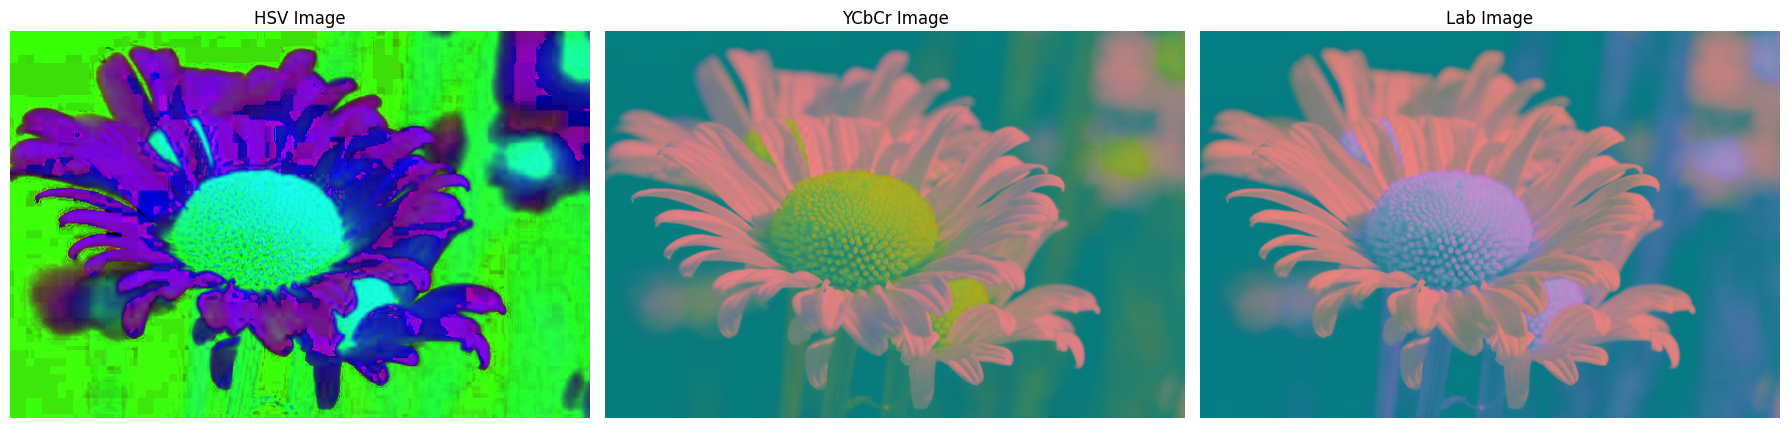

In [ ]:
if image is None:
    print("Error: No image loaded to convert.")
else:
    # Convert original BGR image to RGB first, if it hasn't been already for this purpose
    # Although the previous cell already did this to create `image_rgb`
    # For direct conversion from `image` (BGR):
    image_rgb_for_conversion = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert RGB to HSV
    image_hsv = cv2.cvtColor(image_rgb_for_conversion, cv2.COLOR_RGB2HSV)

    # Convert RGB to YCbCr
    image_ycbcr = cv2.cvtColor(image_rgb_for_conversion, cv2.COLOR_RGB2YCrCb) # Note: OpenCV uses YCrCb

    # Convert RGB to Lab
    image_lab = cv2.cvtColor(image_rgb_for_conversion, cv2.COLOR_RGB2Lab)

    # Create a figure with subplots to display the converted images
    plt.figure(figsize=(18, 5))

    plt.subplot(1, 3, 1)
    plt.imshow(image_hsv)
    plt.title('HSV Image')
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.imshow(image_ycbcr)
    plt.title('YCbCr Image')
    plt.axis('off')

    plt.subplot(1, 3, 3)
    # For Lab color space, L channel (0-100) and a,b channels (-128 to 127)
    # Matplotlib expects values in 0-1 range for float or 0-255 for uint8.
    # For visualization, it's common to normalize or display channels separately.
    # Displaying the composite Lab image directly can look unusual.
    # Here, we'll normalize L to 0-255 and a,b to 0-255 for display, though it's not truly 'RGB' visualization.
    # A more correct approach might be to show individual L, a, b channels.

    # To display Lab as a recognizable image, it's often converted back to RGB or
    # individual channels are displayed. For a composite display, direct imshow
    # often looks abstract. Let's try to convert back to RGB for visual clarity,
    # or display it as is (which will look strange but technically correct for imshow of Lab).
    # For now, let's display it directly, acknowledging it might not look 'normal'.
    plt.imshow(image_lab) # Displaying directly as it is 3 channels
    plt.title('Lab Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

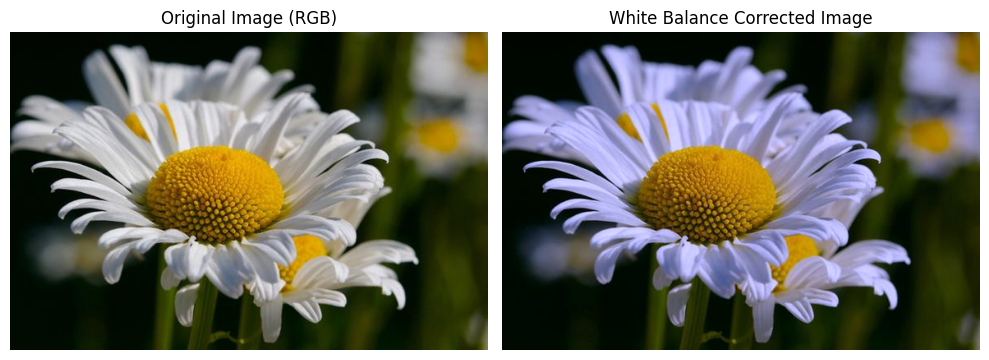

In [ ]:
if image is None:
    print("Error: No image loaded for white balance correction.")
else:
    # Convert the original BGR image to RGB for processing
    image_rgb_wb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Apply Gray World Assumption for white balance correction
    # Calculate the average intensity for each channel
    avg_r = np.mean(image_rgb_wb[:, :, 0])
    avg_g = np.mean(image_rgb_wb[:, :, 1])
    avg_b = np.mean(image_rgb_wb[:, :, 2])

    # Calculate the average overall intensity
    avg_all = (avg_r + avg_g + avg_b) / 3.0

    # Calculate scaling factors for each channel
    scale_r = avg_all / avg_r
    scale_g = avg_all / avg_g
    scale_b = avg_all / avg_b

    # Apply scaling to each channel
    image_wb = np.zeros_like(image_rgb_wb, dtype=np.float32)
    image_wb[:, :, 0] = image_rgb_wb[:, :, 0] * scale_r
    image_wb[:, :, 1] = image_rgb_wb[:, :, 1] * scale_g
    image_wb[:, :, 2] = image_rgb_wb[:, :, 2] * scale_b

    # Clip values to 0-255 range and convert back to uint8
    image_wb = np.clip(image_wb, 0, 255).astype(np.uint8)

    # Display the original and white-balanced images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb_wb)
    plt.title('Original Image (RGB)')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(image_wb)
    plt.title('White Balance Corrected Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

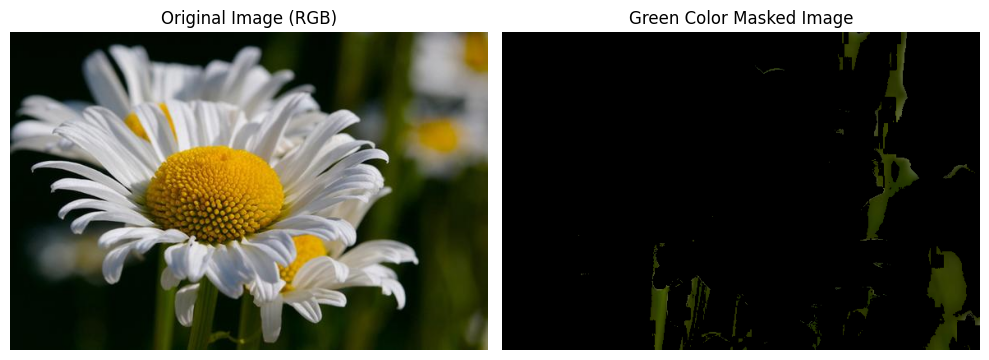

In [ ]:
if image is None:
    print("Error: No image loaded for color masking.")
else:
    # Convert the original BGR image to RGB for consistency
    image_rgb_mask = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Convert RGB to HSV color space
    image_hsv_mask = cv2.cvtColor(image_rgb_mask, cv2.COLOR_RGB2HSV)

    # Define the lower and upper bounds for green color in HSV
    # These values can be adjusted based on the specific shade of green you want to detect.
    # Example range for green: Hue (35-85), Saturation (100-255), Value (50-255)
    lower_green = np.array([35, 100, 50])
    upper_green = np.array([85, 255, 255])

    # Create a mask for green color
    mask_green = cv2.inRange(image_hsv_mask, lower_green, upper_green)

    # Apply the mask to the original image
    green_masked_image = cv2.bitwise_and(image_rgb_mask, image_rgb_mask, mask=mask_green)

    # Display the original and masked images
    plt.figure(figsize=(10, 5))

    plt.subplot(1, 2, 1)
    plt.imshow(image_rgb_mask)
    plt.title('Original Image (RGB)')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(green_masked_image)
    plt.title('Green Color Masked Image')
    plt.axis('off')

    plt.tight_layout()
    plt.show()

# Task
Compare green color segmentation results using HSV, YCbCr, and Lab color spaces for the image "bowsprit_daisy_1_559463.jpg". This includes segmenting green in HSV (using `mask_green`), YCbCr, and Lab, and then displaying the original image alongside the three segmented images for visual comparison.

## Segment Green in HSV

### Subtask:
Utilize the previously generated mask for green color in the HSV color space.


## Segment Green in YCbCr

### Subtask:
Convert the image to the YCbCr color space and apply thresholding to isolate green regions. This will involve defining appropriate lower and upper bounds for the green component in YCbCr.


**Reasoning**:
The subtask requires converting the image to the YCbCr color space and then applying thresholding to isolate green regions. I will define the lower and upper bounds for green in the YCbCr color space as instructed, create a mask using these bounds, apply the mask to the original RGB image, and then display the resulting masked image.



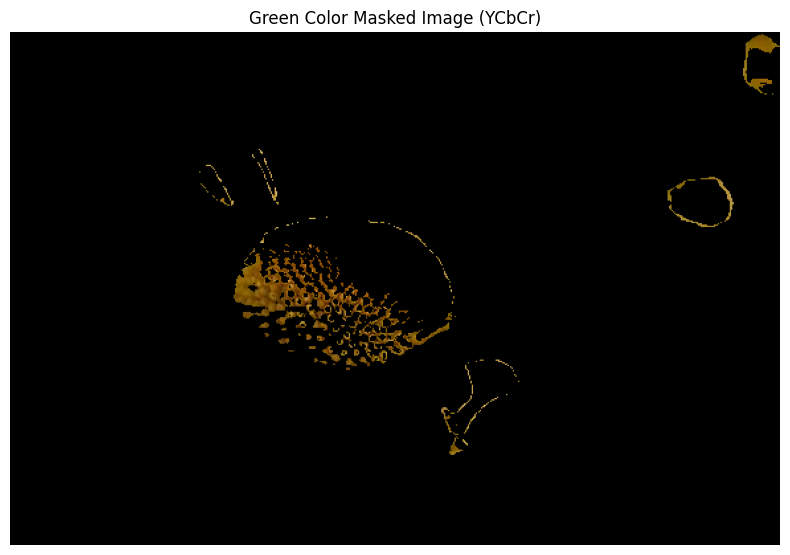

In [ ]:
if image_ycbcr is None or image_rgb_mask is None:
    print("Error: No YCbCr image or RGB image loaded for color masking.")
else:
    # 1. Define the lower and upper bounds for green color in the YCbCr color space.
    # Using the suggested starting range. Adjustment might be needed based on actual image.
    # Y (Luminance), Cb (Blue-difference chroma), Cr (Red-difference chroma)
    lower_green_ycbcr = np.array([0, 150, 70])
    upper_green_ycbcr = np.array([255, 180, 100])

    # 2. Create a mask for the green color using cv2.inRange()
    mask_green_ycbcr = cv2.inRange(image_ycbcr, lower_green_ycbcr, upper_green_ycbcr)

    # 3. Apply the mask to the image_rgb_mask
    green_masked_image_ycbcr = cv2.bitwise_and(image_rgb_mask, image_rgb_mask, mask=mask_green_ycbcr)

    # 4. Display the green_masked_image_ycbcr
    plt.figure(figsize=(8, 6))
    plt.imshow(green_masked_image_ycbcr)
    plt.title('Green Color Masked Image (YCbCr)')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

## Segment Green in Lab

### Subtask:
Convert the image to the Lab color space and apply thresholding to isolate green regions. This will involve defining appropriate lower and upper bounds for the green component in Lab.

## Segment Green in Lab

### Subtask:
Convert the image to the Lab color space and apply thresholding to isolate green regions. This will involve defining appropriate lower and upper bounds for the green component in Lab.

**Reasoning**:
To perform green color segmentation in the Lab color space, I need to define appropriate lower and upper bounds for green in this color space, create a mask using these bounds, and then apply the mask to the original RGB image for visualization.



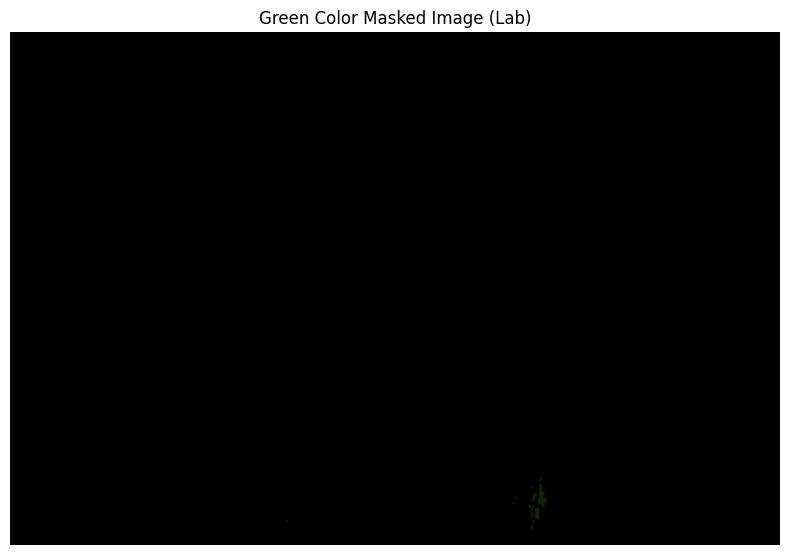

In [ ]:
if image_lab is None or image_rgb_mask is None:
    print("Error: No Lab image or RGB image loaded for color masking.")
else:
    # 1. Define the lower and upper bounds for green color in the Lab color space.
    # Lab values in OpenCV: L (0-255), a (-128 to 127 scaled to 0-255), b (-128 to 127 scaled to 0-255)
    # Green typically has lower 'a' values and 'b' values around neutral or slightly towards blue.
    # These values often need to be empirically adjusted for specific images.
    # A rough starting point for green in OpenCV's 8-bit Lab:
    # L: 0-255 (full range of lightness)
    # a: 0-110 (more towards green, where 128 is neutral)
    # b: 120-150 (near neutral blue-yellow axis)
    lower_green_lab = np.array([0, 0, 0]) # Adjust these values based on actual image characteristics
    upper_green_lab = np.array([255, 110, 150]) # Adjust these values based on actual image characteristics

    # 2. Create a mask for the green color using cv2.inRange()
    mask_green_lab = cv2.inRange(image_lab, lower_green_lab, upper_green_lab)

    # 3. Apply the mask to the image_rgb_mask
    green_masked_image_lab = cv2.bitwise_and(image_rgb_mask, image_rgb_mask, mask=mask_green_lab)

    # 4. Display the green_masked_image_lab
    plt.figure(figsize=(8, 6))
    plt.imshow(green_masked_image_lab)
    plt.title('Green Color Masked Image (Lab)')
    plt.axis('off')
    plt.tight_layout()
    plt.show()

**Reasoning**:
The subtasks for segmenting green in HSV, YCbCr, and Lab color spaces are complete. Now, to fulfill the main task, I need to display the original image and the three segmented images side-by-side for visual comparison.



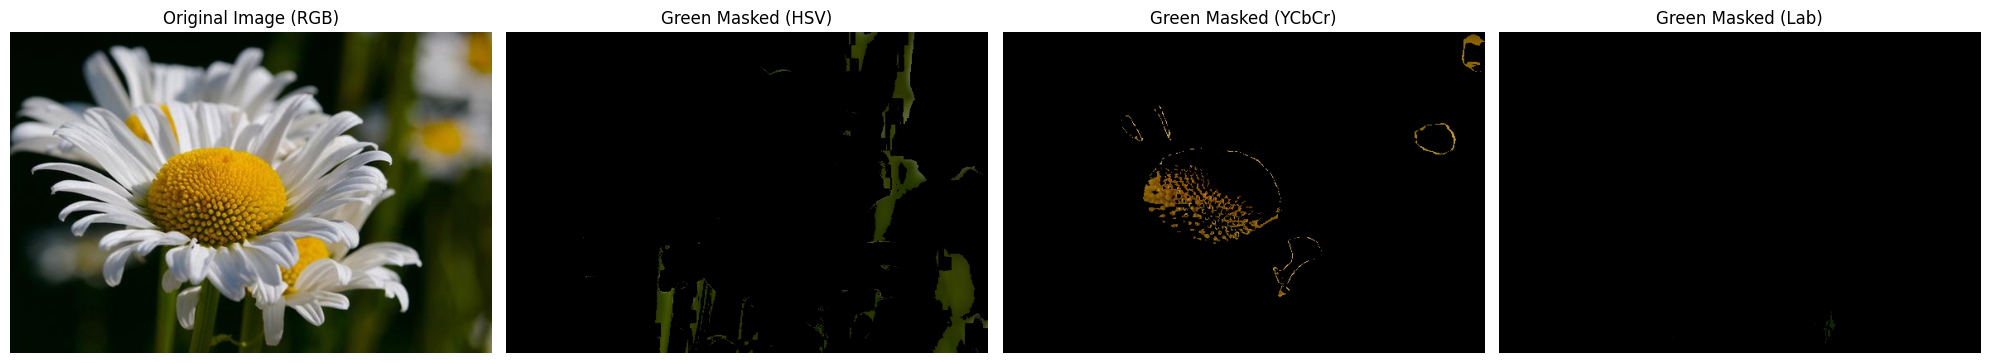

In [ ]:
plt.figure(figsize=(20, 5))

plt.subplot(1, 4, 1)
plt.imshow(image_rgb_mask)
plt.title('Original Image (RGB)')
plt.axis('off')

plt.subplot(1, 4, 2)
plt.imshow(green_masked_image)
plt.title('Green Masked (HSV)')
plt.axis('off')

plt.subplot(1, 4, 3)
plt.imshow(green_masked_image_ycbcr)
plt.title('Green Masked (YCbCr)')
plt.axis('off')

plt.subplot(1, 4, 4)
plt.imshow(green_masked_image_lab)
plt.title('Green Masked (Lab)')
plt.axis('off')

plt.tight_layout()
plt.show()